# Bagging vs Random-Forest: Tree and Node level splitting difference
## In bagging, each decision tree in the ensemble is built independently, using bootstrapped samples of the training data. This means that each tree can potentially split on the same features and nodes, leading to a correlation between the trees and potentially limiting the variance reduction achieved by the ensemble.

## On the other hand, Random Forests introduce additional randomness by selecting a subset of features at each split. This ensures that each tree in the ensemble is trained on a different subset of features, reducing the correlation between the trees. Furthermore, Random Forests also limit the number of features considered at each split, leading to more diverse and robust trees. This enhances the overall performance of the ensemble by reducing overfitting and improving generalization.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.534597,-1.153716,-0.625035,0.073554,4.023143,1
1,1.267997,-2.259019,-0.350082,-1.746716,2.188004,1
2,-1.656034,-1.207407,-1.030259,-2.140165,-0.369788,0
3,-0.241707,1.829704,-1.096893,-0.241851,-0.836817,0
4,-0.395616,-0.168416,0.237936,-0.356260,3.097853,1


In [4]:
bag = BaggingClassifier(max_features=2)

In [5]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

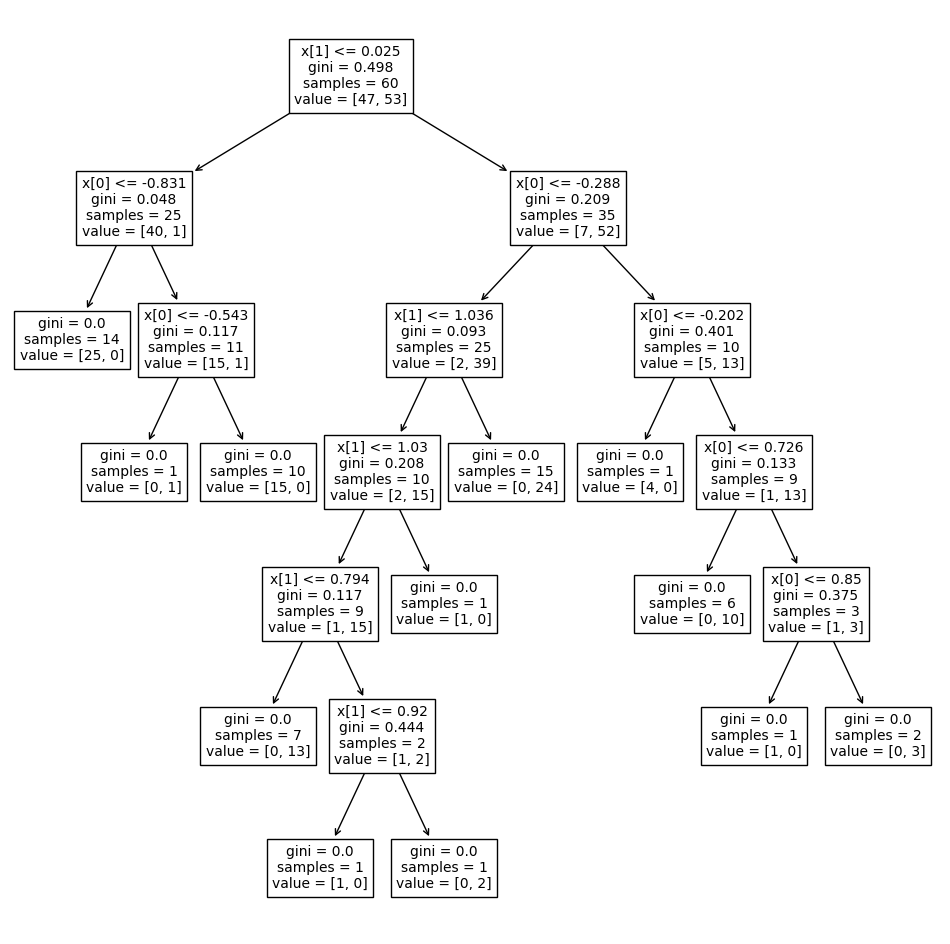

In [6]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

In [7]:
rf = RandomForestClassifier(max_features=2)

In [8]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

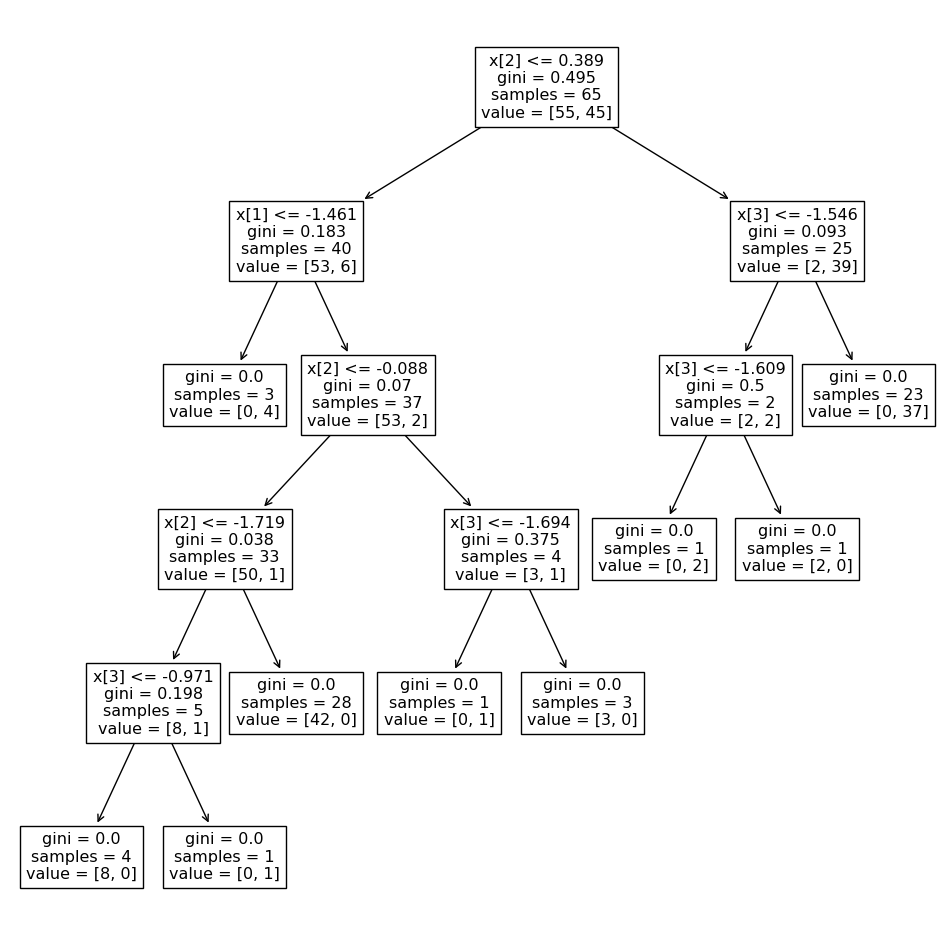

In [9]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()